In [61]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
data=pd.read_csv("/home/mustafa/internship/CodeClause · Internship/CodeClauseInternship_Demand Forecasting for a Retail Store/Datasets/GlobalSuperstoreData.csv")
df=pd.DataFrame(data)
df

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200
...,...,...,...,...,...
51285,19-06-2014,Corporate,APAC,65.100,4.5000
51286,20-06-2014,Consumer,US,0.444,-1.1100
51287,02-12-2013,Home Office,US,22.920,11.2308
51288,18-02-2012,Home Office,LATAM,13.440,2.4000


In [62]:
df.shape

(51290, 5)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [64]:
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [65]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

/tmp/ipykernel_47447/1090850445.py:1: UserWarning: Parsing '31-07-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/tmp/ipykernel_47447/1090850445.py:1: UserWarning: Parsing '17-10-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/tmp/ipykernel_47447/1090850445.py:1: UserWarning: Parsing '28-01-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/tmp/ipykernel_47447/1090850445.py:1: UserWarning: Parsing '28-06-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/tmp/ipykernel_47447/1090850445.py:1: UserWarning: Parsing '14-04-2012' in DD/MM/YYYY format. Provid

In [66]:
df_prophet = df.reset_index().rename(columns={'Order Date':'ds', 'Sales':'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(df_prophet)

# Create future dataframe for next 5 years
future = model.make_future_dataframe(periods=365*5, freq='D')

# Forecast
forecast = model.predict(future)


19:16:39 - cmdstanpy - INFO - Chain [1] start processing
19:16:45 - cmdstanpy - INFO - Chain [1] done processing


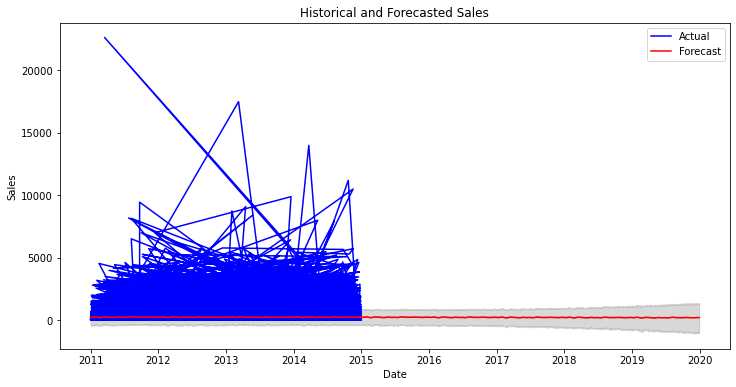

In [67]:
# Visualize forecast
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Historical and Forecasted Sales')
plt.legend()
plt.show()

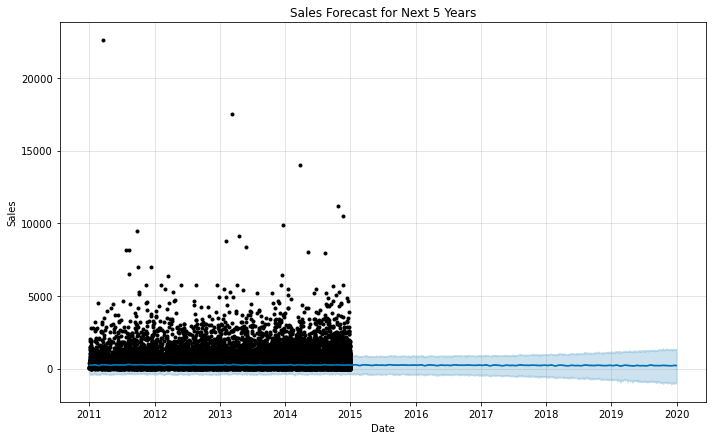

In [68]:
fig = model.plot(forecast)
plt.title('Sales Forecast for Next 5 Years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()